**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 4**
Exploración de datos

---

*   NOMBRE: Eduardo Selim Martínez Mayorga
*   MATRÍCULA: A01795167

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Estoy trabajando en mi local, no en Google Colab

In [2]:
# El archivo "credit_risk_dataset.csv" se encuentra en la misma
# carpeta que este Jupyter Notebook
df = pd.read_csv("credit_risk_dataset.csv")

# Se verifica la lectura y definición del dataframe
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


# **Parte 1**. Análisis descriptivo (univariante)

1. Utiliza el método `info()` del dataframe, para obtener el resumen de los tipos de datos. ¿Cuántas columnas son numéricas y cuántas cualitativas? 

In [3]:
# Se aplica el método info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


Las columnas que toman valores enteros son:
+ `person_age`
+ `person_income`
+ `loan_amnt`
+ `loan_status`
+ `cb_person_cred_hist_length`

Las columnas que toman valores flotantes (reales) son:
+ `person_emp_length`
+ `loan_int_rate`
+ `loan_percent_income`

Es decir que hay 8 columnas numéricas.

Las columnas que toman valores string son:

+ `person_home_ownership`
+ `loan_intent`
+ `loan_grade`
+ `cb_person_default_on_file`

Es decir que hay 4 columnas que toman valores string

Aunque la variable `loan_status` está codificada como variable con valores enteros, dicha variable sólo toma los valores 0 ó 1, que representan una categoría: Estado del préstamo (0 no incumplimiento, 1 incumplimiento o en mora). Entonces está codificada como variable numérica/cuantitativa pero su significado es cualitativo

 2. Determina el porcentaje de valores faltantes por columna.

In [4]:
# En otra de las prácticas ya obtuvimos el NÚMERO de NaNs
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [5]:
# Se pide el porcentaje, por tanto se requiere el número total
# de renglones en el dataframe
len(df)

32581

Entonces haciendo el cociente del número de NaNs entre el total de renglones, se obtiene el porcentaje solicitado

In [6]:
(df.isna().sum())/len(df)

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             0.027470
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 0.095639
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

Pero como somos científicos de datos orientados a la comunicación, le daremos un poco de edición a esta cantidad y la mostraremos como dataframe (con sus fabulosas propiedades de autoimpresión en Jupyter Notebooks)

In [7]:
# Guardamos la serie en un objeto
x = ((df.isna().sum())/len(df))*100

# Convertimos la serie guardada en un dataframe
df_porcentaje_NA = x.apply(pd.Series)

#Cambiamos el nombre de la columna para mayor entendimiento
df_porcentaje_NA.columns = ['porcentaje']

# Redondeamos el número de decimales para mejor lectura
df_porcentaje_NA['porcentaje'] = df_porcentaje_NA['porcentaje'].round(decimals = 4)

# Agregamos el símbolo de porcentaje para mejor lectura
df_porcentaje_NA['porcentaje'] = df_porcentaje_NA['porcentaje'].astype(str) + '%'

In [8]:
df_porcentaje_NA

,porcentaje
person_age,0.0%
person_income,0.0%
person_home_ownership,0.0%
person_emp_length,2.747%
loan_intent,0.0%
loan_grade,0.0%
loan_amnt,0.0%
loan_int_rate,9.5639%
loan_status,0.0%
loan_percent_income,0.0%


# Análisis de variables numéricas

3. Obtén las siguientes estadísticas descriptivas para todas las variables numéricas:
*   Tendencia central (media, mediana)
*   Dispersión o variabilidad (min, max, desviación estándar, cuartiles)
*   Forma (asimetría y curtosis)
*   Clasifica las variables `person_age` y `loan_in_rate` según los valores observados de asimetría y curtosis 
   
**NOTA**. Recuerda que muchas de estas estadísticas, puedes obtenerlas utilizando la función `describe()` y que la mediana está representada en el 2do cuartil (50%) 

In [9]:
# Como menciona la NOTA, con la función describe se pueden obtener
# varias cantidades de las solicitadas

df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


+ La media es el renglón con índice 'mean'
+ La mediana es el renglón con índice '50%'
+ El mínimo es el renglón con índice 'min'
+ El máximo es el renglón con índice 'max'
+ La desviación estándar es el renglón con índice 'std'
+ El cuartil 1 es es el renglón con índice '25%'
+ El cuartil 3 es es el renglón con índice '75%'
+ El cuartil 2 es la mediana

In [10]:
# Se obtiene la curtosis de las variables numéricas
df.kurt(axis=0)

person_age                      18.560825
person_income                 2693.272776
person_emp_length               43.722338
loan_amnt                        1.423565
loan_int_rate                   -0.671609
loan_status                     -0.137088
loan_percent_income              1.223687
cb_person_cred_hist_length       3.716194
dtype: float64

+ La variable `person_age` tiene una curtosis de 18.560825 que es mayor que 3, por tanto se considera que la variable es leptocúrtica

+ La variable `loan_int_rate` tiene una curtosis de -0.671609 que es menor que 3, por tanto se considera que la variable es platocúrtica

In [11]:
# Se obtiene el coeficiente de asimetría de las variables numéricas
df.skew(axis=0)

person_age                     2.581393
person_income                 32.865349
person_emp_length              2.614455
loan_amnt                      1.192477
loan_int_rate                  0.208550
loan_status                    1.364888
loan_percent_income            1.064669
cb_person_cred_hist_length     1.661790
dtype: float64

+ La variable `person_age` tiene una skewness de 2.581393 que es positiva, por tanto se considera que la variable está sesgada a valores grandes. Es decir, la distribución es asimétrica hacia la derecha, i.e. su cola es más larga hacia la derecha.

+ La variable `loan_int_rate` tiene una skewness de 0.208550 que es cercana a cero, por tanto se considera que la variable es simétrica.

4. Utiliza histogramas para determinar la distribución de los valores representados en cada variable. 
*   ¿Se corresponde con lo obtenido en el cálculo de asimetría? Como verás, los datos reales son más complejos que la teoría. Por esta razón, recuerda siempre acompañar el análisis de la asimetría con algún gráfico como un histograma.
 
**NOTA**. Para esto también puedes ocupar los gráficos `kde` ([kernel density estimation](https://www.cienciadedatos.net/documentos/pystats02-kernel-density-estimation-kde-python.html)) que crean una curva continua y suave expandiendo la idea del histograma. 

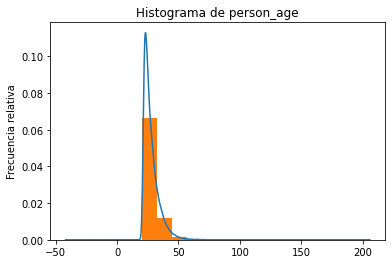

In [12]:
# Hacemos el histograma
fig, ax = plt.subplots()
df['person_age'].plot.kde(ax=ax,
                          legend=False,
                          title='Histograma de person_age')
df['person_age'].plot.hist(density=True, ax=ax)
ax.set_ylabel('Frecuencia relativa');

La variable `person_age` tiene una skewness de 2.58, que es positiva y relativamente pequeña. Pero tiene una curtosis de 18.56 que es muy grande. Por eso la forma alta y picuda y ligeramente sesgada a valores grandes. 

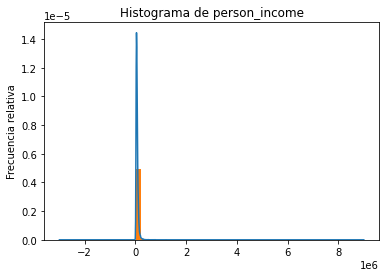

In [13]:
# Hacemos el histograma
fig, ax = plt.subplots()
df['person_income'].plot.kde(ax=ax,
                          legend=False,
                          title='Histograma de person_income')
df['person_income'].plot.hist(density=True, bins = 30, ax=ax)
ax.set_ylabel('Frecuencia relativa');

La variable `person_income` tiene una skewness de 32.86, que es positiva y grande. Además tiene una curtosis de 2693.27 que es muy grande. Por eso la forma alta y picuda y ligeramente sesgada a valores grandes.

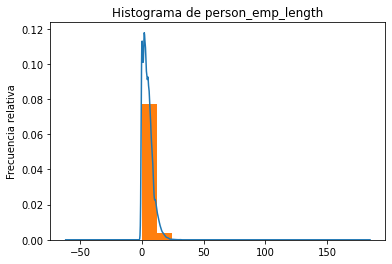

In [14]:
# Hacemos el histograma
fig, ax = plt.subplots()
df['person_emp_length'].plot.kde(ax=ax,
                          legend=False,
                          title='Histograma de person_emp_length')
df['person_emp_length'].plot.hist(density=True, ax=ax)
ax.set_ylabel('Frecuencia relativa');

La variable `person_emp_length` tiene una skewness de 2.614455, que es positiva y relativamente pequeña. Además tiene una curtosis de 43.72 que es muy grande. Por eso la forma alta y picuda y ligeramente sesgada a valores grandes.

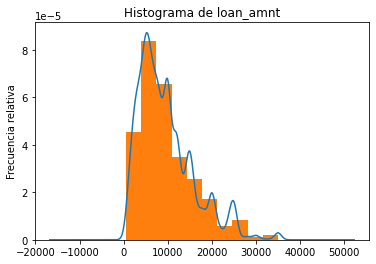

In [15]:
# Hacemos el histograma
fig, ax = plt.subplots()
df['loan_amnt'].plot.kde(ax=ax,
                          legend=False,
                          title='Histograma de loan_amnt')
df['loan_amnt'].plot.hist(density=True, ax=ax)
ax.set_ylabel('Frecuencia relativa');

La variable `loan_amnt` tiene una skewness de 1.19, que es positiva y relativamente pequeña. Además tiene una curtosis de 1.42 que es también relativamente pequeña. Por eso la forma relativamente acampanada y muy ligeramente sesgada a valores grandes pero con moderación

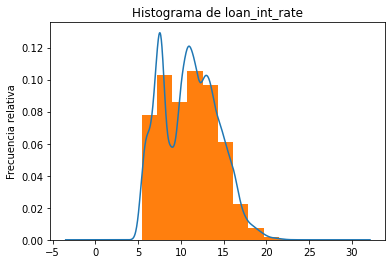

In [16]:
# Hacemos el histograma
fig, ax = plt.subplots()
df['loan_int_rate'].plot.kde(ax=ax,
                          legend=False,
                          title='Histograma de loan_int_rate')
df['loan_int_rate'].plot.hist(density=True, ax=ax)
ax.set_ylabel('Frecuencia relativa');

La variable `loan_int_rate` tiene una skewness de 0.20, que es positiva y cercana a 0. Además tiene una curtosis de -0.67 que es negativa pero muy cercana a 0. Por eso la forma ligeramente acampanada aunque con un una muy ligera asimetría a valores positivos

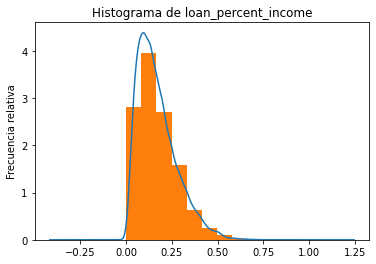

In [17]:
# Hacemos el histograma
fig, ax = plt.subplots()
df['loan_percent_income'].plot.kde(ax=ax,
                          legend=False,
                          title='Histograma de loan_percent_income')
df['loan_percent_income'].plot.hist(density=True, ax=ax)
ax.set_ylabel('Frecuencia relativa');

La variable `loan_percent_income` tiene una skewness de 1.06, que es positiva relativamente pequeña. Además tiene una curtosis de 1.22 que es positiva y también relativamente pequeña. Aunque en este caso estos número y el histograma nos pueden parecer no concordantes pues la gráfica muestra una mayor asimetría

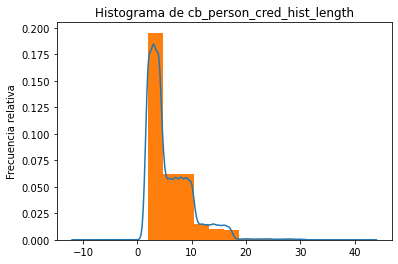

In [18]:
# Hacemos el histograma
fig, ax = plt.subplots()
df['cb_person_cred_hist_length'].plot.kde(ax=ax,
                          legend=False,
                          title='Histograma de cb_person_cred_hist_length')
df['cb_person_cred_hist_length'].plot.hist(density=True, ax=ax)
ax.set_ylabel('Frecuencia relativa');

La variable `cb_person_cred_hist_lengt` tiene una skewness de 1.66, que es positiva relativamente pequeña. Además tiene una curtosis de 3.71 que es positiva mayor que 3. En este caso se espera una forma alta y picuda con una pequeña tendencia asimétrica

5. Emplea boxplots para mostrar la distribución de los datos a través de sus cuartiles.

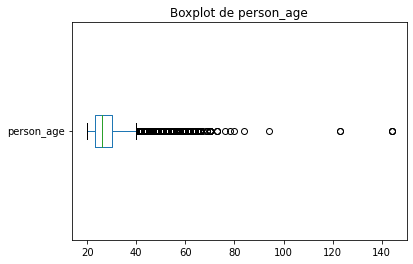

In [19]:
# Realizamos el boxplot de 'person_age'
df['person_age'].plot(kind='box',
                      title='Boxplot de person_age',
                      vert=False);

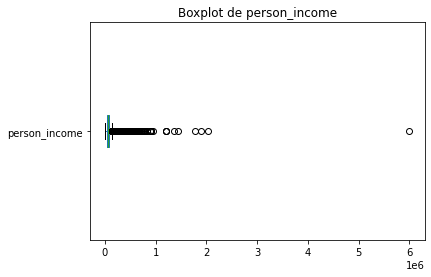

In [20]:
# Realizamos el boxplot de 'person_income'
df['person_income'].plot(kind='box',
                         title='Boxplot de person_income',
                         vert=False);

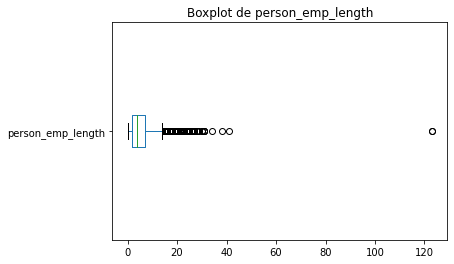

In [21]:
# Realizamos el boxplot de 'person_emp_length'
df['person_emp_length'].plot(kind='box',
                             title='Boxplot de person_emp_length',
                             vert=False);

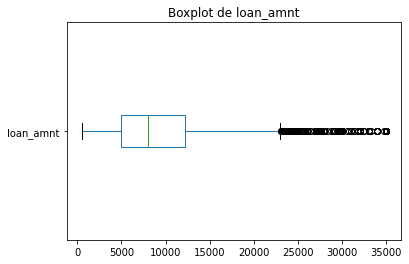

In [22]:
# Realizamos el boxplot de 'loan_amnt'
df['loan_amnt'].plot(kind='box',
                     title='Boxplot de loan_amnt',
                     vert=False);

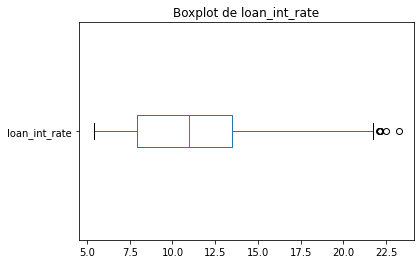

In [23]:
# Realizamos el boxplot de 'loan_int_rate'
df['loan_int_rate'].plot(kind='box',
                         title='Boxplot de loan_int_rate',
                         vert=False);

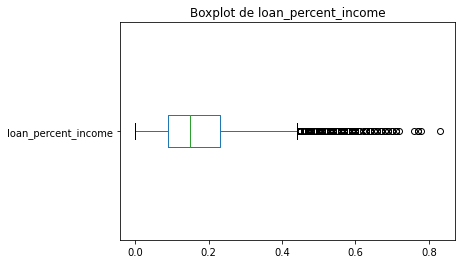

In [24]:
# Realizamos el boxplot de 'loan_percent_income'
df['loan_percent_income'].plot(kind='box',
                               title='Boxplot de loan_percent_income',
                               vert=False);

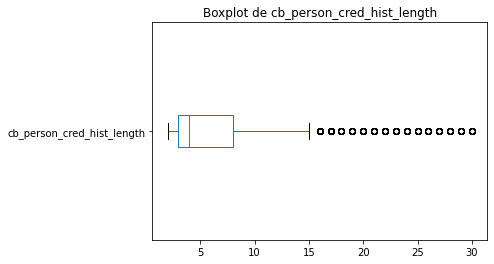

In [25]:
# Realizamos el boxplot de 'cb_person_cred_hist_length'
df['cb_person_cred_hist_length'].plot(kind='box',
                                      title='Boxplot de cb_person_cred_hist_length',
                                      vert=False); 

*   Como podrás observar hay valores atípicos en todas las variables. Ejecuta el siguiente código para identificar los valores atípicos en la variable `person_age`

In [26]:
# Se calculan los cuartiles 1 y 3 de la variable "person_age"
percentile_25 = df["person_age"].quantile(0.25)
percentile_75 = df["person_age"].quantile(0.75)

# Se calcula el rango intercuartil
iqr = percentile_75 - percentile_25

# Se define el límite superior como el cuartil 3 más
# 1.5 veces el rango intercuartil
upper_limit = percentile_75 + 1.5 * iqr

# Se define el límite inferior como el cuartil 1 menos
# 1.5 veces el rango intercuartil
lower_limit = percentile_25 - 1.5 * iqr

# Se filtran los valores debajo del límite inferior
# y los de arriba del límite superior
IQR_outliers = df[(df["person_age"] < lower_limit) | (df["person_age"] > upper_limit)]

# Se imprime el dataframe
IQR_outliers

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
29121,50,900000,MORTGAGE,11.0,DEBTCONSOLIDATION,B,30000,12.69,0,0.03,N,15
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


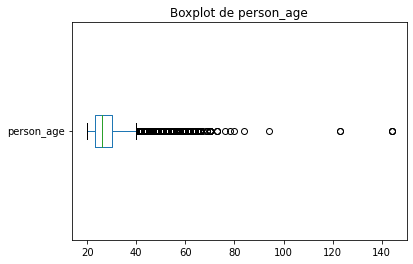

In [27]:
# Realizamos el boxplot de 'person_age'
df['person_age'].plot(kind='box',
                      title='Boxplot de person_age',
                      vert=False);

In [28]:
# Se imprimen los outliers de 'person_age'
IQR_outliers['person_age'].sort_values()

31053     41
31338     41
31346     41
29864     41
31347     41
        ... 
747      123
575      123
32297    144
183      144
81       144
Name: person_age, Length: 1494, dtype: int64

Tanto la tabla y el boxplot confirman que sólo hay outliers derechos y de hecho son aquellas personas que tienen al menos 41 años (incluso tenemos personas de más de 100 años!!!)

# Análisis de variables categóricas

 6. Obtén las siguientes estadísticas descriptivas para todas las variables categóricas:
*   Tendencia central (moda)
*   Cardinalidad (cantidad de valores únicos)
*   Recuentos únicos (número de ocurrencias para cada valor único)
   
**NOTA**. Un resumen de estas estadísticas, puedes obtenerlas indicando en la función `describe()` que se incluirán sólo las variables de tipo object, que en este caso coinciden con las categóricas: `describe(include = 'object')`. Para los recuentos utiliza la función `df["columna"].value_counts()` 

In [29]:
# Como menciona la NOTA, con la función describe se pueden obtener
# varias cantidades de las solicitadas

df.describe(include = 'object')

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,32581,32581,32581,32581
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16446,6453,10777,26836


+ La moda es el renglón con índice 'top' (i.e. la categoría que más se repite para cada variable)
+ La Cardinalidad (cantidad de valores únicos) es el renglón con índice 'unique'

In [30]:
# Para obtener las frecuencias de los valores de
# 'person_home_ownership'
df['person_home_ownership'].value_counts()

RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: person_home_ownership, dtype: int64

In [31]:
# Para obtener las frecuencias de los valores de
# 'loan_intent'
df['loan_intent'].value_counts()

EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: loan_intent, dtype: int64

In [32]:
# Para obtener las frecuencias de los valores de
# 'loan_grade'
df['loan_grade'].value_counts()

A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: loan_grade, dtype: int64

In [33]:
# Para obtener las frecuencias de los valores de
# 'cb_person_default_on_file'
df['cb_person_default_on_file'].value_counts()

N    26836
Y     5745
Name: cb_person_default_on_file, dtype: int64

Se dijo que la variable `loan_status` estaba codificada como variable numérica pero en realidad es una variable cualitativa/categórica. Por tanto también se obtendrán sus frecuencias

In [34]:
# Para obtener las frecuencias de los valores de
# 'loan_status'
df['loan_status'].value_counts()

0    25473
1     7108
Name: loan_status, dtype: int64

7. Utiliza gráficos de barras por variable para representar la frecuencia de cada categoría.

**NOTA**. seaborn posee un gráfico de recuento, para variables categóricas, que calcula la frecuencia de cada categoría sin necesidad de utilizar la función `value_counts()`. Para generarlo debes indicar la columna: `sns.countplot(x="columna", data=df)`

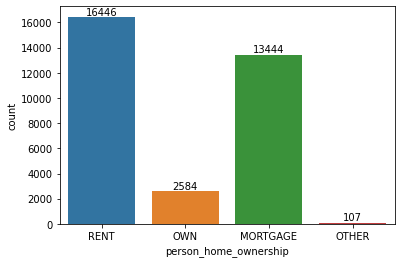

In [35]:
# Se construye la gráfica de barras para "person_home_ownership"
ax = sns.countplot(x="person_home_ownership", data=df)
for container in ax.containers:
    ax.bar_label(container)

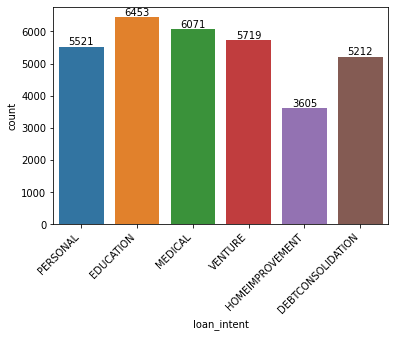

In [36]:
# Se construye la gráfica de barras para "loan_intent"
grafica = sns.countplot(x= "loan_intent", data = df)

grafica.set_xticklabels(grafica.get_xticklabels(),
                        rotation = 45,
                        horizontalalignment = 'right')

for container in grafica.containers:
    grafica.bar_label(container)

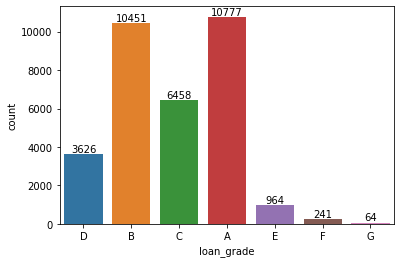

In [37]:
# Se construye la gráfica de barras para "loan_grade"
ax = sns.countplot(x = "loan_grade", data = df)
for container in ax.containers:
    ax.bar_label(container)

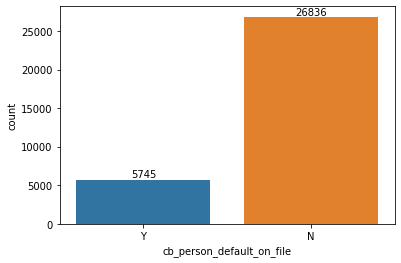

In [38]:
# Se construye la gráfica de barras para "cb_person_default_on_file"
ax = sns.countplot(x = "cb_person_default_on_file", data = df)
for container in ax.containers:
    ax.bar_label(container)

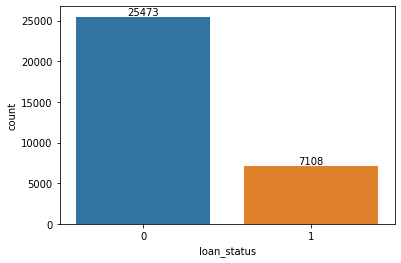

In [39]:
# Se construye la gráfica de barras para "loan_status"
ax = sns.countplot(x = "loan_status", data = df)
for container in ax.containers:
    ax.bar_label(container)

# **Parte 2**. Análisis de correlación (bivariante y multivariante)

La variable `loan_status` será la variable de salida (o a predecir en un modelo de ML). Analiza su relación con el resto de las variables a través de los siguientes gráficos: 

8. Un box plot para visualizar la distribución de `loan_percent_income` según el `loan_status`. Interpreta el resultado.	

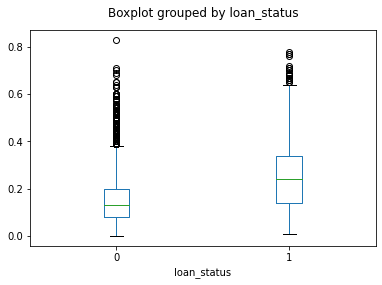

In [40]:
graf = df.boxplot(by = 'loan_status',
           column = ['loan_percent_income'],
           grid = False)

# Axis details
graf.set_title(" ");

Se puede ver que aquellas personas que caen en mora (etiqueta con número 1), el préstamo representa una proporción más alta de su ingreso (en comparación con los que no cayeron en mora). Esto se vé a partir de la mediana y el cuartil 3 de ambos boxplots. Esto también lo confirma la asimetría hacia valores grandes.

 9. En los gráficos de barras que obtuviste en el ejercicio 7, separa el conteo según el `loan_status`, utilizando el parámetro `hue`.

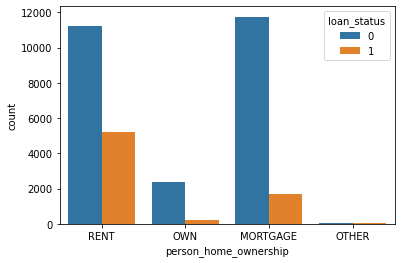

In [41]:
# Realizamos el gráfico de barra por categoría de
# "person_home_ownership"
sns.countplot(x="person_home_ownership",
              data=df,
              hue = "loan_status");

Nótese que caen más personas en mora para aquellos que rentan su casa

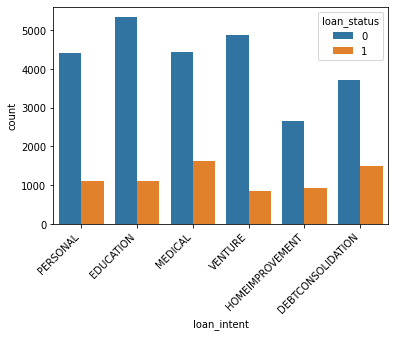

In [42]:
# Realizamos el gráfico de barra por categoría de
# "loan_intent"

grafica = sns.countplot(x = "loan_intent",
                        data= df,
                        hue = "loan_status")

grafica.set_xticklabels(grafica.get_xticklabels(),
                        rotation=45, horizontalalignment='right');

Se puede decir que el objetivo del préstamo no incide en caer en mora. Pues en todos los objetivos hay proporciones parecidas de personas morosas

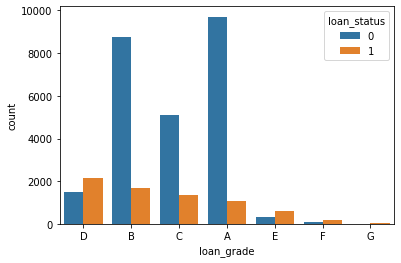

In [43]:
# Realizamos el gráfico de barra por categoría de
# "loan_grade"
sns.countplot(x="loan_grade", data=df, hue = "loan_status");

Valdría la pena revisar la variable `loan_grade` pues si su intención es calificar al deudor no lo hace muy bien, si es que se piensa que A es la mejor calificación y G la peor.

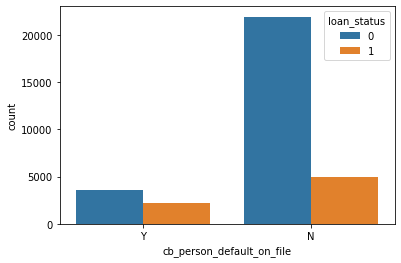

In [44]:
# Realizamos el gráfico de barra por categoría de
# "cb_person_default_on_file"
sns.countplot(x="cb_person_default_on_file",
              data=df, hue = "loan_status");

10. Un mapa de calor con los valores de correlación de todas las variables del dataframe.
*   ¿Qué variable tiene mayor correlación con `loan_status`?

Primero, se obtendrá el mapa de calor asociado con las correlaciones

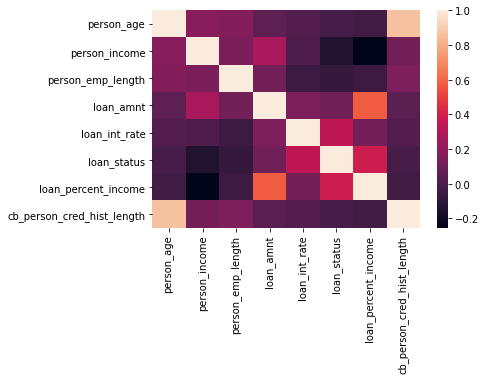

In [45]:
# Se construye el mapa de calor a partir de las correlaciones
sns.heatmap(df.corr());

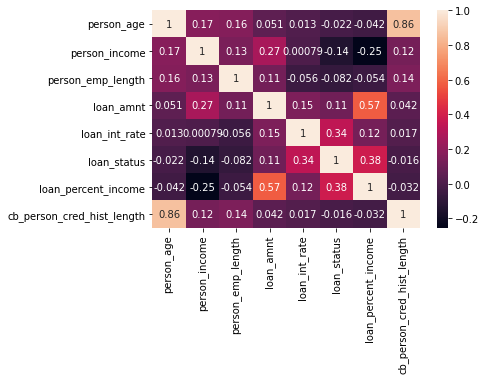

In [46]:
# Se construye el mapa de calor a partir de las correlaciones
# Pero se le agregan las leyendas de las correlaciones
# para mejor visualización
sns.heatmap(df.corr(), annot=True);

+ A través de la escala de colores se puede ver que `loan_int_rate` y `loan_percent_income` están altamente correlacionadas positivamente con `loan_status` (las más claras del renglón/columna `loan_status`)

+ A través de la escala de colores se puede ver que `person_income` está altamente correlacionada negativamente con `loan_status` (la más oscuras del renglón/columna `loan_status`)

In [47]:
# Se obtiene la matriz de correlaciones
matriz_corr = df.corr()
matriz_corr

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.173202,0.163106,0.050787,0.012580,-0.021629,-0.042411,0.859133
person_income,0.173202,1.000000,0.134268,0.266820,0.000792,-0.144449,-0.254471,0.117987
person_emp_length,0.163106,0.134268,1.000000,0.113082,-0.056405,-0.082489,-0.054111,0.144699
loan_amnt,0.050787,0.266820,0.113082,1.000000,0.146813,0.105376,0.572612,0.041967
loan_int_rate,0.012580,0.000792,-0.056405,0.146813,1.000000,0.335133,0.120314,0.016696
loan_status,-0.021629,-0.144449,-0.082489,0.105376,0.335133,1.000000,0.379366,-0.015529
loan_percent_income,-0.042411,-0.254471,-0.054111,0.572612,0.120314,0.379366,1.000000,-0.031690
cb_person_cred_hist_length,0.859133,0.117987,0.144699,0.041967,0.016696,-0.015529,-0.031690,1.000000


In [48]:
# Se obtienen las correlaciones con 'loan_status' y se
# ordenan descendentemente
matriz_corr['loan_status'].sort_values(ascending = False) 

loan_status                   1.000000
loan_percent_income           0.379366
loan_int_rate                 0.335133
loan_amnt                     0.105376
cb_person_cred_hist_length   -0.015529
person_age                   -0.021629
person_emp_length            -0.082489
person_income                -0.144449
Name: loan_status, dtype: float64

Se puede observar que la variable `loan_percent_income` es la que más correlación **positiva** tiene con `loan_status` y la variable `person_income` es la que más correlación **negativa** tiene con `loan_status`